# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm.auto import tqdm, trange
tqdm.pandas()

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


# Data

In [2]:
data = pd.read_csv('Sequences.csv')

In [3]:
data.head()

,Sequence,Length,Solved,r10,r9,r8,r7,r6,r5,r4,...,p5,p4,p3,p2,p1,t-s,t-p,t-d,t-py,misc
0,"[1, 3, 13, 87, 1053, 28576, 2141733, 508147108...",14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[1, 2, 1, 5, 5, 1, 11, 16, 7, 1, 23, 44, 30, 9...",57,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[1, 2, 4, 5, 8, 10, 16, 20, 32, 40, 64, 80, 12...",41,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,"[1, 8, 25, 83, 274, 2275, 132224, 1060067, 331...",20,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[1, 111, 12211, 1343211, 147753211, 1625285321...",12,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data['Sequence'] = data['Sequence'].progress_apply(eval)

In [5]:
data['Sequence'][0]

[1,
 3,
 13,
 87,
 1053,
 28576,
 2141733,
 508147108,
 402135275365,
 1073376057490373,
 9700385489355970183,
 298434346895322960005291,
 31479360095907908092817694945,
 11474377948948020660089085281068730]

# Subsequence Repetition

In [6]:
def checkSubsequenceRepetition(seq, order):
    n = len(seq)
    if n > order:
        subsequence = seq[:order]
        for i in range(n//order):
            if seq[i*order:(i+1)*order] != subsequence:
                return False
        return seq[(n-1)%order] == seq[-1]
    return False

In [7]:
def predictNextTerm_ModeFallback(seq, order):
    return seq[n%order]

## 1st-10th Order Subsequences

Solving 1 order


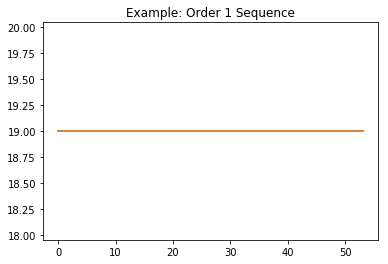


Solved order 1: 35 (0.02%)
Solving 2 order


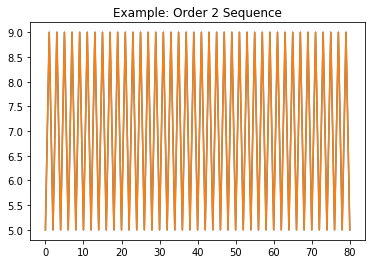


Solved order 2: 119 (0.05%)
Solving 3 order


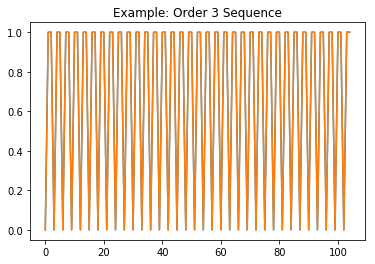


Solved order 3: 99 (0.04%)
Solving 4 order


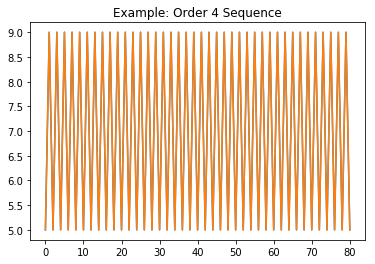


Solved order 4: 232 (0.1%)
Solving 5 order


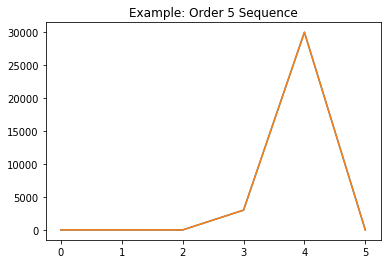


Solved order 5: 163 (0.07%)
Solving 6 order


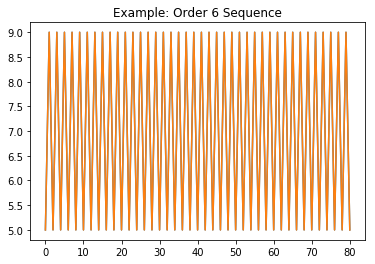


Solved order 6: 438 (0.19%)
Solving 7 order


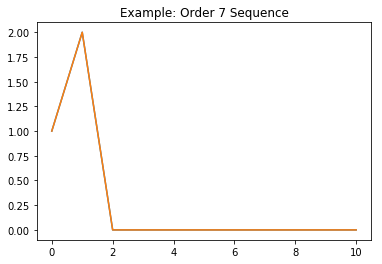


Solved order 7: 151 (0.07%)
Solving 8 order


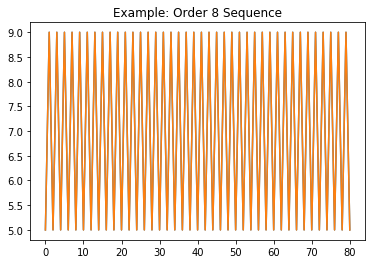


Solved order 8: 422 (0.19%)
Solving 9 order


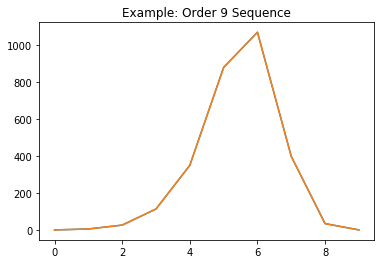


Solved order 9: 287 (0.13%)
Solving 10 order


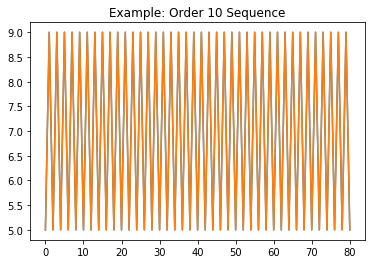


Solved order 10: 405 (0.18%)


In [8]:
for order in range(1, 11):
    print(f'Solving {order} order')
    count = 0
    data[f's{order}'] = 0
    for i in trange(len(data['Sequence'])):
        seq = data['Sequence'][i]
        coeff = checkSubsequenceRepetition(seq,order)
        if coeff:
            count += 1
            data.loc[i, 'Solved'] = 1
            data.loc[i, f's{order}'] = 1
            if count == 1:
                fig, ax = plt.subplots()
                ax.plot(seq)
                plt.plot(seq)
                ax.set_title(f'Example: Order {order} Sequence')
                plt.show()

    print(f'Solved order {order}: {count} ({round((count*100)/len(data),2)}%)')

# Final Standings

In [9]:
data.drop(['Sequence', 'Length'], axis=1).mean(0).mul(100).round(2).astype(str) + '%'

Solved     34.7%
r10        7.89%
r9         9.34%
r8        10.28%
r7        10.05%
r6         9.06%
r5         8.13%
r4         7.62%
r3         6.68%
r2         4.18%
r1         0.74%
p10        2.08%
p9         2.13%
p8         2.13%
p7         2.09%
p6         2.05%
p5         1.86%
p4          1.7%
p3         1.44%
p2         1.12%
p1         0.56%
t-s        0.23%
t-p        0.17%
t-d        0.05%
t-py       0.04%
misc       6.33%
s1         0.02%
s2         0.05%
s3         0.04%
s4          0.1%
s5         0.07%
s6         0.19%
s7         0.07%
s8         0.19%
s9         0.13%
s10        0.18%
dtype: object

In [10]:
data.to_csv('Sequences.csv', index=False)